In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data_20May.csv', header = 1, parse_dates = ['Date/Time'])
df.head()

,Date/Time,avg,max,min,avg.1,min.1,avg.2,avg.3,min.2,avg.4,...,avg.23,max.9,min.9,last.1,last.2,avg.24,max.10,min.10,time.1,Daily ET0 [mm]
0,2023-05-20 10:00:00,32.84,33.32,32.27,11.2,10.1,689,3.64,3.39,26.94,...,28.9,29.0,28.9,9403,6784,13,14,13,30,NaN
1,2023-05-20 09:00:00,30.45,31.99,28.78,16.0,13.6,549,2.53,1.85,42.22,...,28.9,29.0,28.9,8934,6790,9,12,7,60,NaN
2,2023-05-20 08:00:00,26.61,28.27,24.85,18.5,17.7,346,1.35,0.93,61.41,...,28.9,28.9,28.9,6993,6733,5,7,4,60,NaN
3,2023-05-20 07:00:00,21.60,24.40,19.39,18.9,18.1,92,0.39,0.13,85.32,...,28.9,29.0,28.9,6786,6576,2,3,1,15,NaN
4,2023-05-20 06:00:00,19.25,19.85,18.90,18.1,17.9,4,0.15,0.12,93.18,...,28.9,29.0,28.9,3709,6502,1,1,1,0,NaN


# Changing Column Names:

In [ ]:
df.columns = ['Date/Time', 'air_temp_avg', 'air_temp_max', 'air_temp_min', 'dew_avg',
       'dew_min', 'solar_rad_avg', 'vpd_avg', 'vpd_min', 'rel_humi_avg',
       'rel_humi_max', 'rel_humi_min', 'precp_sum', 'leaf_wetness_time(min)',
       'wind_speed_avg', 'wind_speed_max', 'wind_gust_max', 'wind_dir_last',
       'eag_sm1_avg', 'eag_sm2_avg', 'eag_sm3_avg', 'eag_sm4_avg',
       'eag_sm5_avg', 'eag_sm6_avg', 'VIC1_avg', 'VIC2_avg', 'VIC3_avg',
       'VIC4_avg', 'VIC5_avg', 'VIC6_avg', 'soil_temp1_avg', 'soil_temp1_max',
       'soil_temp1_min', 'soil_temp2_avg', 'soil_temp2_max', 'soil_temp2_min',
       'soil_temp3_avg', 'soil_temp3_max', 'soil_temp3_min', 'soil_temp4_avg',
       'soil_temp4_max', 'soil_temp4_min', 'soil_temp5_avg', 'soil_temp5_max',
       'soil_temp5_min', 'soil_temp6_avg', 'soil_temp6_max', 'soil_temp6_min',
       'sp_last', 'bat_last', 'del_avg', 'del_max', 'del_min', 'sun_time',
       'Daily ET0 [mm]']

## Formatting and Setting Date/Time as index:

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = "%d-%m-%Y %H:%M:%S")
df.set_index('Date/Time', inplace = True)

# Dropping Irrelevant Features:

In [ ]:
df.drop(['leaf_wetness_time(min)','wind_dir_last',
       'eag_sm1_avg', 'eag_sm2_avg', 'eag_sm3_avg', 'eag_sm4_avg',
       'eag_sm5_avg', 'eag_sm6_avg', 'VIC1_avg', 'VIC2_avg', 'VIC3_avg',
       'VIC4_avg', 'VIC5_avg', 'VIC6_avg', 'soil_temp1_avg', 'soil_temp1_max',
       'soil_temp1_min', 'soil_temp2_avg', 'soil_temp2_max', 'soil_temp2_min',
       'soil_temp3_avg', 'soil_temp3_max', 'soil_temp3_min', 'soil_temp4_avg',
       'soil_temp4_max', 'soil_temp4_min', 'soil_temp5_avg', 'soil_temp5_max',
       'soil_temp5_min', 'soil_temp6_avg', 'soil_temp6_max', 'soil_temp6_min',
       'sp_last', 'bat_last','sun_time'], axis = 1, inplace = True)

# Reversing the Dataset to get in order:

In [ ]:
df = df.iloc[::-1]
df.head()

,air_temp_avg,air_temp_max,air_temp_min,dew_avg,dew_min,solar_rad_avg,vpd_avg,vpd_min,rel_humi_avg,rel_humi_max,rel_humi_min,precp_sum,wind_speed_avg,wind_speed_max,wind_gust_max,del_avg,del_max,del_min,Daily ET0 [mm]
Date/Time,,,,,,,,,,,,,,,,,,,
2023-04-25 11:00:00,35.74,35.74,35.74,4.1,4.1,66,5.03,5.03,13.99,13.99,13.99,0.0,0.0,0.0,1.1,18,18,18,NaN
2023-04-25 12:00:00,36.64,37.19,36.04,8.1,5.5,1063,5.05,4.95,17.70,19.70,15.26,1.2,0.3,1.0,2.5,17,18,17,NaN
2023-04-25 13:00:00,35.27,35.87,34.58,5.2,3.8,625,4.81,4.68,15.60,16.96,14.68,0.0,1.4,1.8,3.9,17,18,17,NaN
2023-04-25 14:00:00,35.97,36.71,35.51,6.0,4.7,957,4.98,4.83,15.85,17.36,14.49,0.0,1.3,1.9,3.5,18,18,17,NaN
2023-04-25 15:00:00,36.33,36.72,35.49,6.0,4.7,811,5.10,4.91,15.60,18.13,14.05,0.0,1.2,1.9,3.6,18,18,17,NaN


# Preprocessing:


In [ ]:
df.isnull().sum()

air_temp_avg        0
air_temp_max        0
air_temp_min        0
dew_avg             0
dew_min             0
solar_rad_avg       0
vpd_avg             0
vpd_min             0
rel_humi_avg        0
rel_humi_max        0
rel_humi_min        0
precp_sum           0
wind_speed_avg      0
wind_speed_max      0
wind_gust_max       0
del_avg             0
del_max             0
del_min             0
Daily ET0 [mm]    575
dtype: int64

In [ ]:
df['Daily ET0 [mm]'].fillna(0, inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

0

# Basic Temperature Trend-Plot:

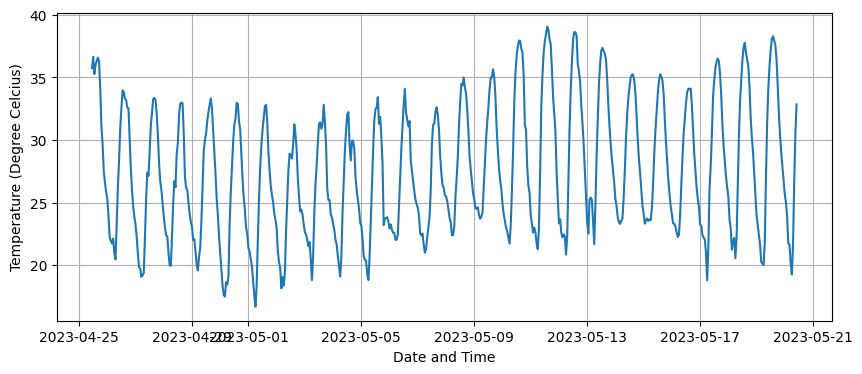

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(df['air_temp_avg'])
plt.ylabel('Temperature (Degree Celcius)')
plt.xlabel('Date and Time')
plt.grid()
plt.show()

# Scaling:


In [ ]:
min_temp = df['air_temp_avg'].min()
max_temp = df['air_temp_avg'].max()
print(f"Minimum Average Temperature: {min_temp} and Maximum Average Temepature: {max_temp}")

Minimum Average Temperature: 16.68 and Maximum Average Temepature: 39.05


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df1 = pd.DataFrame(ms.fit_transform(df), columns = df.columns, index = df.index)
df1.head()

,air_temp_avg,air_temp_max,air_temp_min,dew_avg,dew_min,solar_rad_avg,vpd_avg,vpd_min,rel_humi_avg,rel_humi_max,rel_humi_min,precp_sum,wind_speed_avg,wind_speed_max,wind_gust_max,del_avg,del_max,del_min,Daily ET0 [mm]
Date/Time,,,,,,,,,,,,,,,,,,,
2023-04-25 11:00:00,0.852034,0.818182,0.879600,0.000000,0.016043,0.058304,0.871750,0.906306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067797,1.000000,0.947368,1.000000,0.0
2023-04-25 12:00:00,0.892266,0.881862,0.893230,0.213904,0.090909,0.939046,0.875217,0.891892,0.043326,0.066411,0.014948,0.098361,0.111111,0.303030,0.305085,0.944444,0.947368,0.944444,0.0
2023-04-25 13:00:00,0.831024,0.823891,0.826897,0.058824,0.000000,0.552120,0.833622,0.843243,0.018802,0.034543,0.008121,0.000000,0.518519,0.545455,0.542373,0.944444,0.947368,0.944444,0.0
2023-04-25 14:00:00,0.862316,0.860782,0.869150,0.101604,0.048128,0.845406,0.863085,0.870270,0.021721,0.039195,0.005885,0.000000,0.481481,0.575758,0.474576,1.000000,0.947368,0.944444,0.0
2023-04-25 15:00:00,0.878409,0.861221,0.868242,0.101604,0.048128,0.716431,0.883882,0.884685,0.018802,0.048151,0.000706,0.000000,0.444444,0.575758,0.491525,1.000000,0.947368,0.944444,0.0


In [ ]:
# generating a function that results in X and y such that
# X ---> y that is
# [[1row1] [row2] [row3] [row4]] ---> [temp5]
# [[row2] [row3] [row4] [row5]] ---> [temp6]
# [[row3] [row4] [row5] [row6]] ---> [temp7] and so on
# here window_size refers to the total number of past hours that would be
# considered for predicting next 5th teamperature
def get_X_y(df, window_size = 4):
  target_idx = df.columns.get_loc('air_temp_avg')
  # print(target_idx)
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [val for val in df_as_np[i:i+window_size]]
    X.append(row)
    labels = df_as_np[i+window_size][target_idx]
    y.append(labels)
  return np.array(X), np.array(y)

In [ ]:
X, y = get_X_y(df1, 4)
X.shape, y.shape

((596, 4, 19), (596,))

# Splitting into Train and Test Data:

In [ ]:
e5_percent = int(round((0.85*len(X)),0))
X_train, y_train = X[:e5_percent], y[:e5_percent]
X_test, y_test = X[e5_percent:], y[e5_percent:]

In [ ]:
print("Training Shape:")
print(X_train.shape, y_train.shape)
print("Testing Shape:")
print(X_test.shape, y_test.shape)

Training Shape:
(507, 4, 19) (507,)
Testing Shape:
(89, 4, 19) (89,)


## Hyperparameter Tuning to get Best LSTM Model:

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 16.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, GRU
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# lstm build function:
def build_model(hp):
  mod = Sequential()
  mod.add(InputLayer((4,19)))
  mod.add(LSTM(units = hp.Int('LSTM_units1', min_value = 5, max_value =96, step = 12),
               return_sequences = True))
  mod.add(LSTM(units = hp.Int('LSTM_units2', min_value = 5, max_value = 32, step = 6)))
  mod.add(Dense(units = hp.Int('Dense1_units', min_value = 4, max_value = 48, step = 12),
                activation = 'linear'))
  mod.add(Dense(units = 1, activation = 'linear'))

  mod.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
  return mod

In [ ]:
tuner = RandomSearch(build_model, objective = 'mse', max_trials = 10, directory = 'avg_temp_hp', project_name = 'lstm_tuning')

In [ ]:
tuner.search(X_train, y_train, validation_data = (X_test, y_test), epochs = 300)

Trial 10 Complete [00h 00m 56s]
mse: 0.0008692458504810929

Best mse So Far: 0.0008465677965432405
Total elapsed time: 00h 11m 53s


In [ ]:
best_lstm_model = tuner.get_best_models(num_models = 1)[0]
best_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 65)             22100     
                                                                 
 lstm_1 (LSTM)               (None, 11)                3388      
                                                                 
 dense (Dense)               (None, 4)                 48        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25,541
Trainable params: 25,541
Non-trainable params: 0
_________________________________________________________________


## Prediction Function:

In [ ]:
def plot_line(m, X, y):
  pred = m.predict(X).flatten()
  df_pred = pd.DataFrame(data = {'Predictions':pred, 'Actual':y})
  # df_pred.plot(kind = 'line', figsize = (10,4))
  mse = mean_squared_error(y, pred)
  print("Mean Squared Error of Provided model is: ", mse)
  return df_pred, mse

## MSE Calculator Function:

In [ ]:
def real_mse(temp_df, act, pred):
  temp_df['SquaredError'] = (temp_df[act] - temp_df[pred])**2
  mse = np.mean(temp_df['SquaredError'])
  return mse

## Reverse Scaling Function:

In [ ]:
def rev_min_max_func(scaled_val):
  og = (scaled_val*(max_temp - min_temp)) + min_temp
  return og

## Training and Testing Pred with MSE for best LSTM model:

In [ ]:
training_pred, training_lstm_mse = plot_line(best_lstm_model, X_train, y_train)

16/16 [==============================] - 1s 3ms/step
Mean Squared Error of Provided model is:  0.0009418412888503554


In [ ]:
test_pred, test_lstm_mse = plot_line(best_lstm_model, X_test, y_test)

3/3 [==============================] - 0s 4ms/step
Mean Squared Error of Provided model is:  0.001505328556693026


## Train Data:

In [ ]:
train_df = training_pred.applymap(rev_min_max_func)
# train_df['Date/Time'] = df.index[4:e5_percent + 4]
train_df.set_index(df1.index[4:e5_percent+4], inplace = True)
train_df.head()

,Predictions,Actual
Date/Time,,
2023-04-25 15:00:00,35.742199,36.33
2023-04-25 16:00:00,35.459714,36.58
2023-04-25 17:00:00,35.058728,36.27
2023-04-25 18:00:00,34.466625,34.13
2023-04-25 19:00:00,30.413052,31.15


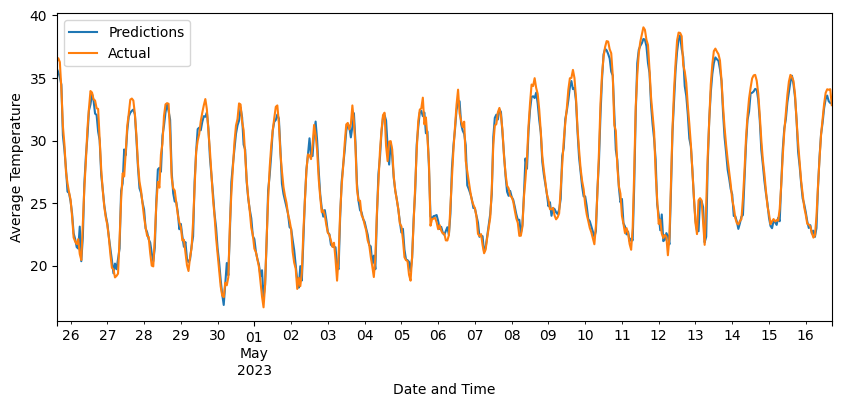

In [ ]:
#plotting:
# train_df[['Predictions','Actual']].plot(kind = 'line', figsize = (10, 4))
train_df.plot(kind = 'line', figsize = (10, 4))
plt.xlabel('Date and Time')
plt.ylabel('Average Temperature')
plt.show()

## Test Data:

In [ ]:
test_df = test_pred.applymap(rev_min_max_func)
# test_df['Date/Time'] = df.index[e5_percent+4:]
test_df.set_index(df1.index[e5_percent+4:], inplace = True)
test_df.head()

,Predictions,Actual
Date/Time,,
2023-05-16 18:00:00,30.898181,30.85
2023-05-16 19:00:00,28.340553,28.95
2023-05-16 20:00:00,27.123586,27.61
2023-05-16 21:00:00,26.253007,26.24
2023-05-16 22:00:00,25.016172,25.32


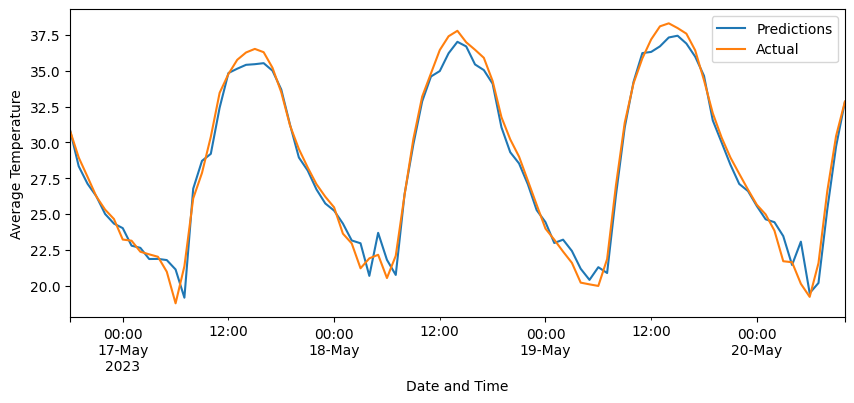

In [ ]:
# test_df[['Predictions','Actual']].plot(kind = 'line', figsize = (10,4))
test_df.plot(kind = 'line', figsize = (10,4))
plt.xlabel('Date and Time')
plt.ylabel('Average Temperature')
plt.show()

## Entire Data Prediction:

In [ ]:
df_pred, df_lstm_mse = plot_line(best_lstm_model, X, y)
# df_pred['Date/Time'] = df.index[4:]
df_pred.set_index(df.index[4:], inplace = True)

19/19 [==============================] - 0s 3ms/step
Mean Squared Error of Provided model is:  0.0010259861715814372


In [ ]:
df_pred[['Predictions','Actual']] = df_pred[['Predictions','Actual']].applymap(rev_min_max_func)
df_pred.head()

,Predictions,Actual
Date/Time,,
2023-04-25 15:00:00,35.742199,36.33
2023-04-25 16:00:00,35.459714,36.58
2023-04-25 17:00:00,35.058728,36.27
2023-04-25 18:00:00,34.466625,34.13
2023-04-25 19:00:00,30.413052,31.15


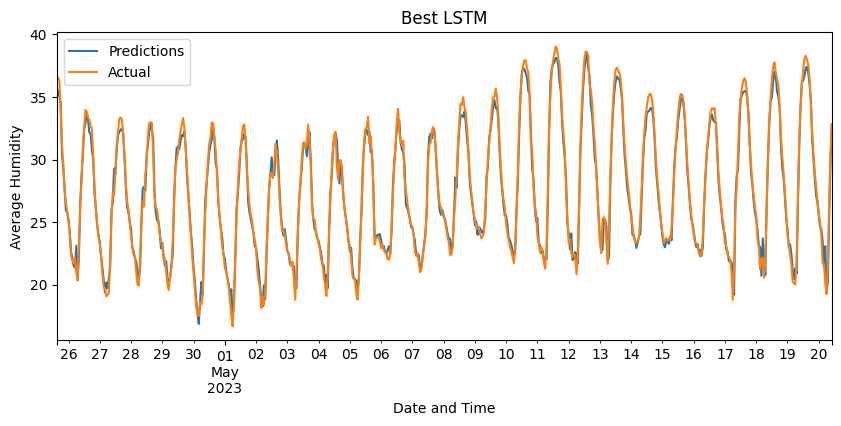

In [ ]:
#plotting:
# df_pred[['Predictions','Actual']].plot(kind = 'line', figsize = (10,4))
df_pred.plot(kind = 'line', figsize = (10,4))
plt.xlabel('Date and Time')
plt.ylabel('Average Humidity')
plt.title("Best LSTM")
plt.savefig('full_lstm_pred.png')

## MSE of Best LSTM:

In [ ]:
lstm_mse1 = real_mse(df_pred, act = 'Actual', pred = 'Predictions')
print(f"Lowest Possible MSE after fine tuning is {lstm_mse1}")

Lowest Possible MSE after fine tuning is 0.513420819425651


## Hyperparameter tuning for getting best GRU Model:

In [ ]:
def build_model1(hp):
  mod1 = Sequential()
  mod1.add(InputLayer((4,19)))
  mod1.add(GRU(units = hp.Int('GRU_units1', min_value = 5, max_value = 96, step = 12),
              return_sequences = True))
  mod1.add(GRU(units = hp.Int('GRU_units2', min_value = 5, max_value = 32, step = 6)))
  mod1.add(Dense(units = hp.Int('Dense1_unit', min_value = 4, max_value = 48, step = 12),
                activation = 'linear'))
  mod1.add(Dense(units = 1, activation = 'linear'))

  mod1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
  return mod1

In [ ]:
tuner1 = RandomSearch(build_model1, objective = 'mse', max_trials = 10, directory = 'avg_temp_hp', project_name = 'gru_tuning')

In [ ]:
tuner1.search(X_train, y_train, validation_data = (X_test, y_test), epochs = 300)

Trial 10 Complete [00h 00m 54s]
mse: 0.0009641158976592124

Best mse So Far: 0.0007942640222609043
Total elapsed time: 00h 10m 39s


In [ ]:
best_gru_model = tuner1.get_best_models(num_models = 1)[0]
best_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 65)             16770     
                                                                 
 gru_1 (GRU)                 (None, 23)                6210      
                                                                 
 dense (Dense)               (None, 28)                672       
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 23,681
Trainable params: 23,681
Non-trainable params: 0
_________________________________________________________________


# Prediction on Train and test using best GRU model:

## Train Data:

In [ ]:
gru_train_pred, gru_train_mse = plot_line(best_gru_model, X_train, y_train)
# gru_train_pred['Date/Time'] = df.index[4:e5_percent+4]
gru_train_pred.set_index(df.index[4:e5_percent+4], inplace = True)

16/16 [==============================] - 1s 3ms/step
Mean Squared Error of Provided model is:  0.0008011487447535631


In [ ]:
gru_train_pred[['Predictions','Actual']] = gru_train_pred[['Predictions','Actual']].applymap(rev_min_max_func)
gru_train_pred.head()

,Predictions,Actual
Date/Time,,
2023-04-25 15:00:00,36.886387,36.33
2023-04-25 16:00:00,36.425628,36.58
2023-04-25 17:00:00,36.031474,36.27
2023-04-25 18:00:00,35.238613,34.13
2023-04-25 19:00:00,31.150497,31.15


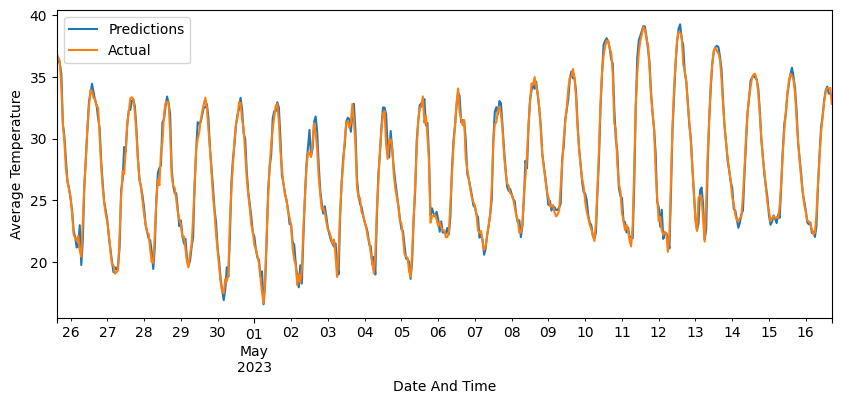

In [ ]:
#plotting:
# gru_train_pred[['Predictions','Actual']].plot(kind = 'line', figsize = (10, 4))
gru_train_pred.plot(kind = 'line', figsize = (10, 4))
plt.xlabel('Date And Time')
plt.ylabel('Average Temperature')
plt.show()

## Test Data:

In [ ]:
gru_test_pred, gru_test_mse = plot_line(best_gru_model, X_test, y_test)
# gru_test_pred['Date/Time'] = df.index[e5_percent + 4:]
gru_test_pred.set_index(df.index[e5_percent+4:], inplace = True)

3/3 [==============================] - 0s 4ms/step
Mean Squared Error of Provided model is:  0.0014721409124228298


In [ ]:
gru_test_pred[['Predictions', 'Actual']] = gru_test_pred[['Predictions', 'Actual']].applymap(rev_min_max_func)
gru_test_pred.head()

,Predictions,Actual
Date/Time,,
2023-05-16 18:00:00,31.559753,30.85
2023-05-16 19:00:00,28.900470,28.95
2023-05-16 20:00:00,27.690639,27.61
2023-05-16 21:00:00,26.605724,26.24
2023-05-16 22:00:00,25.302421,25.32


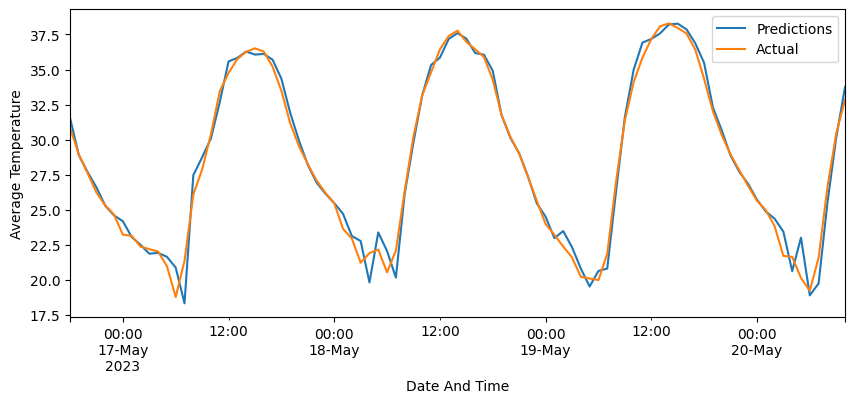

In [ ]:
# gru_test_pred[['Predictions', 'Actual']].plot(kind = 'line', figsize = (10, 4))
gru_test_pred.plot(kind = 'line', figsize = (10, 4))
plt.xlabel('Date And Time')
plt.ylabel('Average Temperature')
plt.show()

## Entire Data:

In [ ]:
entire_gru_pred, entire_gru_mse = plot_line(best_gru_model, X, y)
# entire_gru_pred['Date/Time'] = df.index[4:]
entire_gru_pred.set_index(df.index[4:], inplace = True)

19/19 [==============================] - 0s 2ms/step
Mean Squared Error of Provided model is:  0.00090134723113727


In [ ]:
entire_gru_pred[['Predictions','Actual']] = entire_gru_pred[['Predictions','Actual']].applymap(rev_min_max_func)
entire_gru_pred.head()

,Predictions,Actual
Date/Time,,
2023-04-25 15:00:00,36.886387,36.33
2023-04-25 16:00:00,36.425628,36.58
2023-04-25 17:00:00,36.031474,36.27
2023-04-25 18:00:00,35.238613,34.13
2023-04-25 19:00:00,31.150497,31.15


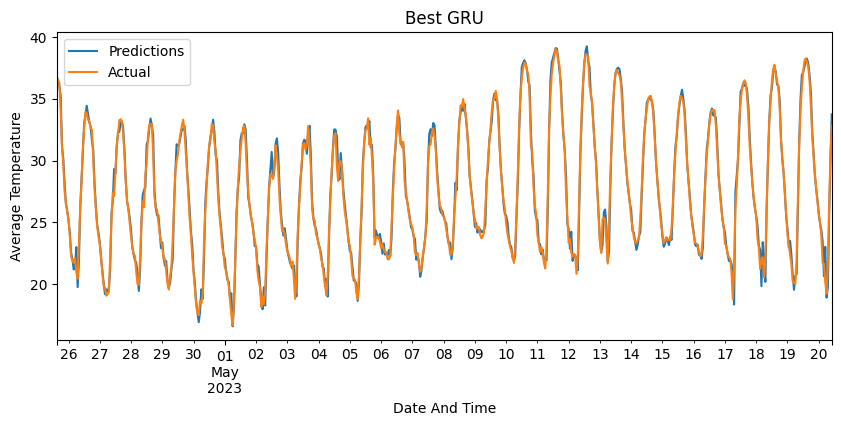

In [ ]:
#plotting:
# entire_gru_pred[['Predictions','Actual']].plot(kind = 'line', figsize = (10, 4))
entire_gru_pred.plot(kind = 'line', figsize = (10, 4))
plt.title('Best GRU')
plt.xlabel('Date And Time')
plt.ylabel('Average Temperature')
plt.savefig('full_gru_pred.png')

## MSE of Best GRU Model:

In [ ]:
mse_gru = real_mse(entire_gru_pred, act = 'Actual', pred = 'Predictions')
print(f"The lowest possible MSE using GRU is {mse_gru}")

The lowest possible MSE using GRU is 0.451049387229296


## Comparing Both Models:

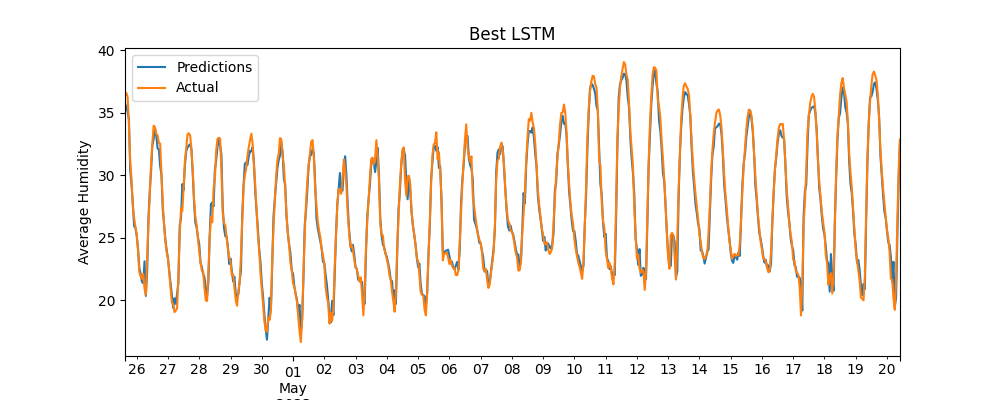

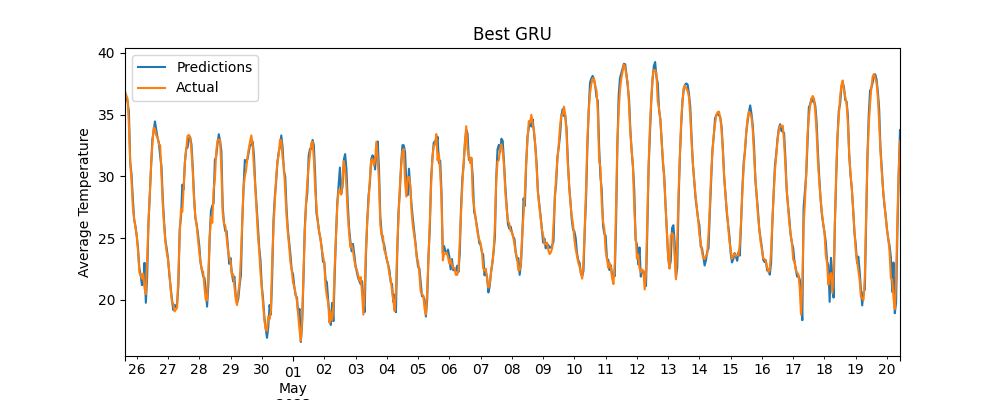

In [ ]:
from IPython.display import Image
from IPython.display import display
x1 = Image(filename='full_lstm_pred.png')
y1 = Image(filename='full_gru_pred.png')
display(x1, y1)

In [ ]:
print(f"MSE for LSTM: {lstm_mse1}")
print(f"MSE for GRU : {mse_gru}")

MSE for LSTM: 0.513420819425651
MSE for GRU : 0.451049387229296


## Mean Absolute Error:

In [ ]:
mae_lstm = mean_absolute_error(df_pred['Predictions'], df_pred['Actual'])
mae_gru = mean_absolute_error(entire_gru_pred['Predictions'], entire_gru_pred['Actual'])
print(f"The Mean Absolute error of LSTM is {mae_lstm}")
print(f"The Mean Absolute error of GRU is {mae_gru}")

The Mean Absolute error of LSTM is 0.5571405547874165
The Mean Absolute error of GRU is 0.489503248095381


## The model with lowest MSE and MAE is the model that is best fit for HC Average Air Temperature Prediction based on significant features.